In [4]:
%matplotlib inline

In [30]:
from __future__ import print_function
print(__doc__)

import pandas as pd
import numpy as np
import sys
from pandas import DataFrame

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets, linear_model
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing



Automatically created module for IPython interactive environment


In [31]:
data = pd.read_csv('train.csv')
data.keys()

data['datetime'] = pd.to_datetime(data['datetime'])
year, month = data['datetime'].dt.year, data['datetime'].dt.month

#data['new_test'] = pd.to_numeric(data['datetime'].map(str)
data['new_date'] = (year.map(str) + '.'+ month.map(str)).map(float)

print(data[:4])

   ID            datetime  temperature  var1  pressure  windspeed var2  \
0   0 2013-07-01 00:00:00        -11.4 -17.1    1003.0    571.910    A   
1   1 2013-07-01 01:00:00        -12.1 -19.3     996.0    575.040    A   
2   2 2013-07-01 02:00:00        -12.9 -20.0    1000.0    578.435    A   
3   3 2013-07-01 03:00:00        -11.4 -17.1     995.0    582.580    A   

   electricity_consumption  new_date  
0                    216.0    2013.7  
1                    210.0    2013.7  
2                    225.0    2013.7  
3                    216.0    2013.7  


In [111]:
# Dividir nossos dados

#datetime = pd.to_datetime(data['datetime'])
#datetime.dt.strftime('%Y.%m')

# print(datetime)

# datetime.replace('.0','.')

# print(datetime)
Y = data['electricity_consumption']

ec_data = ['new_date','temperature', 'pressure', 'windspeed']
X = data[ec_data]


# X = data['new_date_column']
# df = data

# df.datetime = pd.to_datetime(df.datetime, format='%b %d- %Y', errors='coerce')
# print (df)

# print(X)
# print(Y)
train, test, train_labels, test_labels = train_test_split(X,
                                                          Y,
                                                          test_size=0.1,
                                                          random_state=0)

print('--------')

#print(train['datetime'][:5])
#print(feature_names[1:],'\n')
#print(train_labels)
print(train.shape)
print(test.shape)

--------
(23846, 4)
(2650, 4)


Text(0, 0.5, 'Temperature')

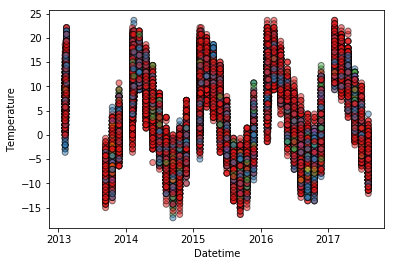

In [113]:
#Plota 
plt.scatter(train['new_date'][:], train['temperature'][:], c=train_labels[:],
            cmap=plt.cm.Set1, edgecolor='k',alpha=0.5)
plt.xlabel('Datetime')
plt.ylabel('Temperature')

#plt.xticks(my_xticks[:10])

#plt.grid(axis='y', linestyle='-')
#plt.show()



In [108]:
# # create the plot space upon which to plot the data
# fig, ax= plt.subplots(figsize = (25,25))

# # add the x-axis and the y-axis to the plot
# ax.plot(train['new_date'], 
#         train['temperature'], 
#         color = 'red')

# # rotate tick labels
# plt.setp(ax.get_xticklabels(), rotation=45)

# # set title and labels for axes
# ax.set(xlabel="Date",
#        ylabel="Temperature",
#        title="Grafico 1");

0.9999986603511094


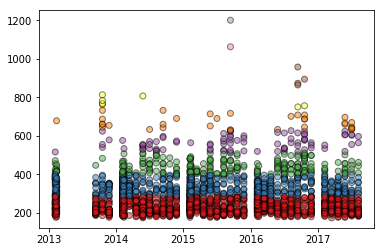

In [110]:
clf = GradientBoostingRegressor(loss='ls', alpha=0.95,
                                n_estimators=550, max_depth=10,
                                learning_rate=.5, min_samples_leaf=9,
                                min_samples_split=9)
clf.fit(test, test_labels)
pred = clf.predict(test)

plt.scatter(test['new_date'][:], pred[:], c=test_labels[:],
            cmap=plt.cm.Set1, edgecolor='k',alpha=0.5)
print(clf.score(test, test_labels))